In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

# Train Test

In [4]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('DEATH_EVENT',axis=1), df[['DEATH_EVENT']], random_state=1,train_size=.70)

In [5]:
xtrain.shape

(209, 12)

In [6]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126


In [7]:
xtest.shape

(90, 12)

In [8]:
xtest.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
173,50.0,1,115,0,20,0,189000.0,0.8,139,1,0,146
287,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250
51,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43
146,52.0,0,132,0,30,0,218000.0,0.7,136,1,1,112
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194


In [9]:
ytrain.shape

(209, 1)

In [10]:
ytrain.head()

,DEATH_EVENT
14,0
210,0
236,0
44,1
163,1


In [11]:
ytest.shape

(90, 1)

In [12]:
ytest.head()

,DEATH_EVENT
173,0
287,0
51,1
146,0
214,0


In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [14]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

# prediction

In [15]:
pred = dt.predict(xtrain)
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [16]:
ytrain.head()

,DEATH_EVENT
14,0
210,0
236,0
44,1
163,1


In [17]:
ytrain['Pred'] = pred
ytrain.head()

,DEATH_EVENT,Pred
14,0,0
210,0,0
236,0,0
44,1,1
163,1,1


In [18]:
ytrain.tail()

,DEATH_EVENT,Pred
203,0,0
255,0,0
72,1,1
235,0,0
37,1,1


In [19]:
dt.score(xtrain, ytrain['DEATH_EVENT'])

1.0

In [20]:
pred2 = dt.predict(xtest)
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [21]:
dt.score(xtest, ytest)

0.8111111111111111

In [22]:
ytest['Pred2'] = pred2
ytest.head()

,DEATH_EVENT,Pred2
173,0,0
287,0,0
51,1,0
146,0,0
214,0,0


# Confusion Matrix

In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,plot_roc_curve

In [24]:
print(classification_report(ytest['DEATH_EVENT'], pred2))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        64
           1       0.71      0.58      0.64        26

    accuracy                           0.81        90
   macro avg       0.78      0.74      0.76        90
weighted avg       0.80      0.81      0.80        90



In [25]:
cm=confusion_matrix(ytest['DEATH_EVENT'], pred2)
cm

array([[58,  6],
       [11, 15]], dtype=int64)

<AxesSubplot:>

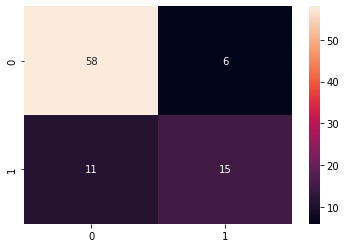

In [26]:
sns.heatmap(cm, annot=True)

In [27]:
(58+15) / (58+15+6+11)

0.8111111111111111

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest['DEATH_EVENT'], pred2)

0.8111111111111111

In [29]:
dt.score(xtest, ytest['DEATH_EVENT'])

0.8111111111111111

In [30]:
confusion_matrix(ytest['DEATH_EVENT'], pred2).reshape(-1)

array([58,  6, 11, 15], dtype=int64)

In [31]:
tp, fp, fn, tn = confusion_matrix(ytest['DEATH_EVENT'], pred2).reshape(-1)

In [32]:
acc = (tp+tn)/(tp+fp+fn+tn)
acc

0.8111111111111111

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


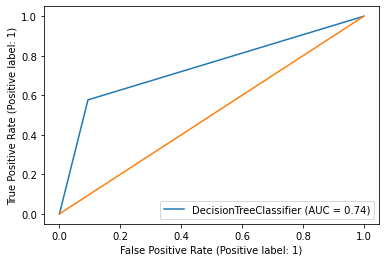

In [33]:
plot_roc_curve(dt, xtest , ytest['DEATH_EVENT'])
plt.plot([0,1],[0,1])

# Accuracy / Recognition Rate

In [34]:
(tp + tn ) / (tp + fp + tn + fn)

0.8111111111111111

# Precision or Positive Predictive Value (PPV)

In [35]:
(tp) / (tp + fp)

0.90625

# Sensitivity, Recall, Hit Rate, or True Positive Rate (TPR)

In [36]:
(tp ) / (tp + fn)

0.8405797101449275

# False Positive Rate (FPR) or 1-Specificity

In [37]:
(fp) / (fp + tn)

0.2857142857142857

# Specificity, Selectivity or True Negative Rate (TNR)

In [38]:
(tn) / (tn + fp)

0.7142857142857143

# Threat Score (TS) or Critical Success Index (CSI)

In [39]:
(tp) / (tp + fp + fn)

0.7733333333333333

# False Discovery Rate (FDR)

In [40]:
(fp) / (tp + fp)

0.09375

# Harmonic Mean, F-Measure

In [41]:
ppv = (tp) / (tp + fp)
tpr = (tp ) / (tp + fn)
(2 * ppv * tpr)/(ppv + tpr)

0.8721804511278196

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


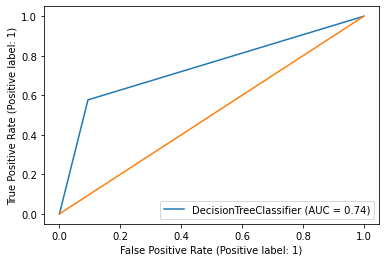

In [42]:
plot_roc_curve(dt, xtest , ytest['DEATH_EVENT'])
plt.plot([0,1],[0,1])

▪ In general, an AUC of 0.5 suggests no discrimination (like the ability to diagnose patients with and without
the disease or condition based on the test)
▪ 0.7 to 0.8 is considered acceptable
▪ 0.8 to 0.9 is considered excellent, and
▪ more than 0.9 is considered outstanding.

So, this acceptable